In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Customer comments dataset
comments_df = pd.read_csv('/content/drive/MyDrive/United Airlines/Datasets/Survey data _Customer comments.csv')

In [ ]:
# DATA CLEANING

comments_df = comments_df.dropna(subset=['verbatim_text'])
comments_df = comments_df.drop_duplicates()
comments_df['verbatim_text'] = comments_df['verbatim_text'].str.lower()
comments_df['verbatim_text'] = comments_df['verbatim_text'].str.strip()

In [ ]:
# Text preprocessing and tokenization
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = nltk.word_tokenize(text)
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

comments_df['processed_text'] = comments_df['verbatim_text'].apply(preprocess_text)

In [ ]:
# Sentiment Analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    sentiment = max(sentiment_scores, key=sentiment_scores.get)
    return sentiment

comments_df['sentiment'] = comments_df['processed_text'].apply(analyze_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


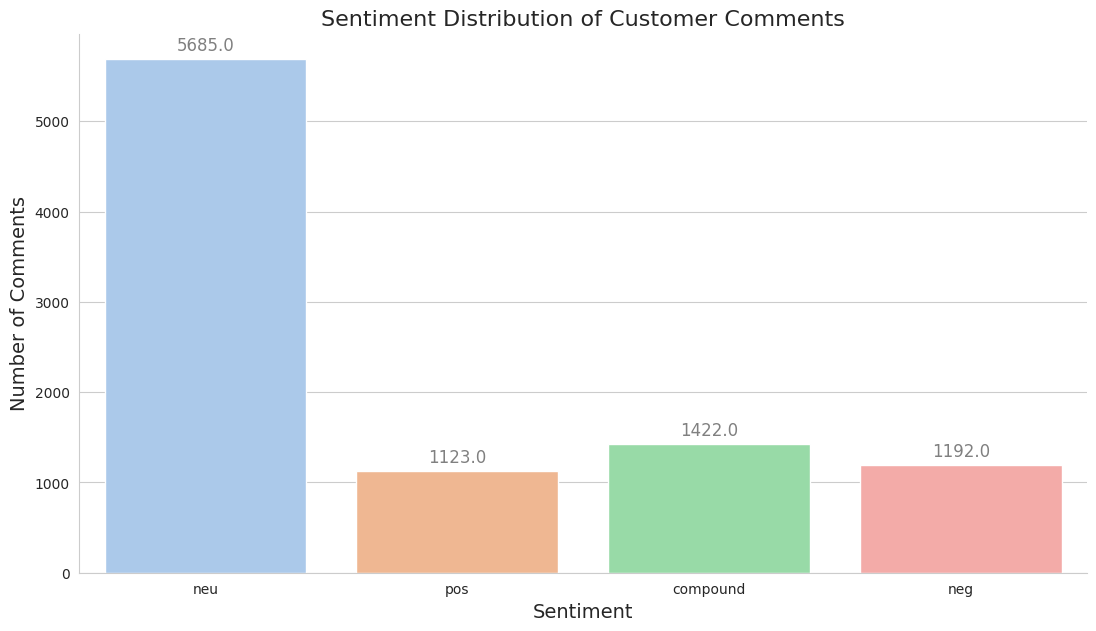

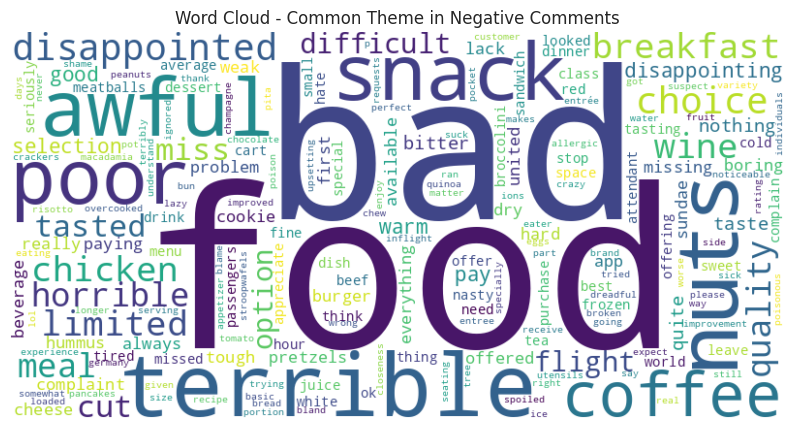

In [ ]:
# Visualization using Seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(13, 7))

ax = sns.countplot(x='sentiment', data=comments_df, palette="pastel")

plt.title('Sentiment Distribution of Customer Comments', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Number of Comments', fontsize=14)

# Data labels on top of bars
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='gray', xytext=(0, 10), textcoords='offset points')

sns.despine()
plt.show()

# Word Cloud
negative_comments = comments_df[comments_df['sentiment'] == 'neg']['processed_text'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_comments)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Common Theme in Negative Comments')
plt.show()
